# Power Outages

**Name(s)**: Karsin Dass & Cole Doyle

**Website Link**: https://keemarice.github.io/PowerOutages/

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from lec_utils import * # Feel free to uncomment and use this. It'll make your plotly graphs look like ours in lecture!

## Introduction

In [19]:
outageFull = pd.read_csv('outage.csv', usecols = list(range(2, 56)), header = 0, skiprows=5,) #with units
print(outageFull.head())
print(outageFull.columns)
#print nmber of columns
print(outageFull.columns.size)

     YEAR  MONTH U.S._STATE POSTAL.CODE NERC.REGION      CLIMATE.REGION  \
0     NaN    NaN        NaN         NaN         NaN                 NaN   
1  2011.0    7.0  Minnesota          MN         MRO  East North Central   
2  2014.0    5.0  Minnesota          MN         MRO  East North Central   
3  2010.0   10.0  Minnesota          MN         MRO  East North Central   
4  2012.0    6.0  Minnesota          MN         MRO  East North Central   

  ANOMALY.LEVEL CLIMATE.CATEGORY                 OUTAGE.START.DATE  \
0       numeric              NaN  Day of the week, Month Day, Year   
1          -0.3           normal              Friday, July 1, 2011   
2          -0.1           normal              Sunday, May 11, 2014   
3          -1.5             cold         Tuesday, October 26, 2010   
4          -0.1           normal            Tuesday, June 19, 2012   

              OUTAGE.START.TIME  ... POPULATION POPPCT_URBAN POPPCT_UC  \
0  Hour:Minute:Second (AM / PM)  ...        NaN       

## Data Cleaning and Exploratory Data Analysis

### Cleaning

In [4]:
outageClean = outageFull[["YEAR", "U.S._STATE", "POSTAL.CODE", "NERC.REGION", "CAUSE.CATEGORY", "OUTAGE.DURATION", "DEMAND.LOSS.MW", "CUSTOMERS.AFFECTED"	]]
outageClean = outageClean.iloc[1:]
outageClean[['YEAR', 'OUTAGE.DURATION']].dropna()
outageClean['YEAR'] = pd.to_numeric(outageClean['YEAR'])
outageClean['OUTAGE.DURATION'] = pd.to_numeric(outageClean['OUTAGE.DURATION'])
outageClean['DEMAND.LOSS.MW'] = pd.to_numeric(outageClean['DEMAND.LOSS.MW'])
outageClean['CUSTOMERS.AFFECTED'] = pd.to_numeric(outageClean['CUSTOMERS.AFFECTED'])

outageClean

,YEAR,U.S._STATE,POSTAL.CODE,NERC.REGION,CAUSE.CATEGORY,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED
1,2011.0,Minnesota,MN,MRO,severe weather,3060.0,NaN,70000.0
2,2014.0,Minnesota,MN,MRO,intentional attack,1.0,NaN,NaN
3,2010.0,Minnesota,MN,MRO,severe weather,3000.0,NaN,70000.0
4,2012.0,Minnesota,MN,MRO,severe weather,2550.0,NaN,68200.0
5,2015.0,Minnesota,MN,MRO,severe weather,1740.0,250.0,250000.0
...,...,...,...,...,...,...,...,...
1530,2011.0,North Dakota,ND,MRO,public appeal,720.0,155.0,34500.0
1531,2006.0,North Dakota,ND,MRO,fuel supply emergency,NaN,1650.0,NaN
1532,2009.0,South Dakota,SD,RFC,islanding,59.0,84.0,NaN
1533,2009.0,South Dakota,SD,MRO,islanding,181.0,373.0,NaN


### Univariate Analysis

In [5]:
fig = px.histogram(outageClean, x = 'YEAR', nbins = 17)
fig.update_layout(title = "Power Outages per Year (2000 - 2016)", xaxis_title = "Year", yaxis_title = "Number of Outages")
fig.update_layout(
   xaxis = dict(
      tickmode = 'linear',
      tick0 = 2000,
      dtick = 1
   )
)
fig.show()



In [6]:
small = outageClean[outageClean["OUTAGE.DURATION"] < 10000]

fig = px.histogram(x = small['OUTAGE.DURATION'])
fig.update_layout(title = "Distribution of Outage Duration", xaxis_title = "Outage Duration (minutes)", yaxis_title = "Number of Outages")
fig.show()


### Bivariate Analysis

In [22]:
fig = px.scatter(outageClean, x='OUTAGE.DURATION', y='CUSTOMERS.AFFECTED', title='Outage Duration vs Customers Affected')
fig.update_layout(xaxis_title='Outage Duration (minutes)', yaxis_title='Customers Affected')
fig.show()

fig = px.scatter(outageClean, x='DEMAND.LOSS.MW', y='CUSTOMERS.AFFECTED', title='Demand Loss vs Customers Affected')
fig.update_layout(xaxis_title='Demand Loss (MW)', yaxis_title='Customers Affected')
fig.show()


In [7]:
durationstate = outageClean.groupby("POSTAL.CODE")["OUTAGE.DURATION"].mean().reset_index()

fig = px.choropleth(
    durationstate,
    locations="POSTAL.CODE",  
    locationmode="USA-states",  
    color="OUTAGE.DURATION",  # depper red = more customers affected
    scope="usa", 
    title="Average Outage Duration by State",
    color_continuous_scale="Reds",
    labels={"OUTAGE.DURATION": "Average Outage Duration (minutes)"},
)
fig.show()






In [8]:
durationregion = outageClean.groupby("NERC.REGION")["OUTAGE.DURATION"].mean().reset_index()

fig = px.bar(durationregion, x = 'NERC.REGION', y = 'OUTAGE.DURATION')
fig.update_layout(title = "Average Outage Duration by North American Electric Reliability Corporation (NERC) Regions", xaxis_title = "NERC Regions", yaxis_title = "Average Outage Duration (minutes)")

fig.show()

### Interesting Aggreates

In [9]:
outageClean.groupby('YEAR')['OUTAGE.DURATION'].mean().reset_index()

,YEAR,OUTAGE.DURATION
0,2000.0,2843.076923
1,2001.0,1272.071429
2,2002.0,4751.000000
3,2003.0,4652.434783
4,2004.0,4368.788732
5,2005.0,5288.944444
6,2006.0,3329.530303
7,2007.0,2336.666667
8,2008.0,4184.018182
9,2009.0,3660.519481


In [11]:
#group by day of the week
outageClean['DATE'] = pd.to_datetime(outageClean['YEAR'], format='%Y')
outageClean['DAY'] = outageClean['DATE'].dt.day_name()
outageClean['DAY'] = pd.Categorical(outageClean['DAY'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
print(outageClean.groupby('DAY')['OUTAGE.DURATION'].mean().reset_index())


         DAY  OUTAGE.DURATION
0     Monday      2117.485294
1    Tuesday      2662.568841
2  Wednesday      3581.180000
3   Thursday      2721.417323
4     Friday      2718.816993
5   Saturday      2402.366071
6     Sunday      2278.824268


/var/folders/p_/yyb_zpwd6fj2v05f12wq70pc0000gn/T/ipykernel_75488/3888886289.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Baseline Model

In [97]:
numeric_columns = outageClean.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()
correlated_features = correlation_matrix['OUTAGE.DURATION'].drop('OUTAGE.DURATION').sort_values(ascending=False)

print("Features most positively correlated with OUTAGE.DURATION:")
print(correlated_features[correlated_features > 0].head())

print("\nFeatures most negatively correlated with OUTAGE.DURATION:")
print(correlated_features[correlated_features < 0].head())


Features most positively correlated with OUTAGE.DURATION:
CUSTOMERS.AFFECTED    0.261916
DEMAND.LOSS.MW        0.026798
Name: OUTAGE.DURATION, dtype: float64

Features most negatively correlated with OUTAGE.DURATION:
YEAR   -0.144047
Name: OUTAGE.DURATION, dtype: float64


In [102]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = outageClean[['CUSTOMERS.AFFECTED']]
X = X.fillna(X.mean())
y = outageClean['OUTAGE.DURATION']
y = y.fillna(y.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#print rmse
print(mean_squared_error(y_test, y_pred, squared=False))

fig = px.scatter(x = X_test['CUSTOMERS.AFFECTED'], y = y_test)
fig.add_scatter(x = X_test['CUSTOMERS.AFFECTED'], y = y_pred, mode = 'lines')
fig.update_layout(title = "Customers Affected vs Outage Duration", xaxis_title = "Customers Affected", yaxis_title = "Outage Duration (minutes)")
fig.show()


8350.875280739045


/Users/karsi/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [100]:
#lets do multiple linear regression, with every column except for the target column
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = outageClean[['CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW', 'YEAR']]  
X = X.fillna(X.mean())  
y = outageClean['OUTAGE.DURATION']
y = y.fillna(y.mean()) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"Root Mean Squared Error: {rmse}")


print(model.coef_)
print(model.intercept_)
#print formula
print(f"y = {model.intercept_} + {model.coef_[0]} * x1 + {model.coef_[1]} * x2 + {model.coef_[2]} * x3")


Root Mean Squared Error: 4921.596123137184
[ 3.51719809e-03 -9.26875681e-02 -1.32394853e+02]
268285.8521177814
y = 268285.8521177814 + 0.003517198094173996 * x1 + -0.09268756813452225 * x2 + -132.39485298606147 * x3


/Users/karsi/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Prepare data
X = outageClean[['CAUSE.CATEGORY', 'NERC.REGION', 'U.S._STATE', 'YEAR', 'CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW']]
y = outageClean['OUTAGE.DURATION']  # Target variable

# Handle missing values
X['YEAR'] = X['YEAR'].fillna(0).astype(int)
X['CAUSE.CATEGORY'] = X['CAUSE.CATEGORY'].fillna("Missing")
X['NERC.REGION'] = X['NERC.REGION'].fillna("Missing")
X['U.S._STATE'] = X['U.S._STATE'].fillna("Missing")
X['CUSTOMERS.AFFECTED'] = X['CUSTOMERS.AFFECTED'].fillna(X['CUSTOMERS.AFFECTED'].mean())
X['DEMAND.LOSS.MW'] = X['DEMAND.LOSS.MW'].fillna(X['DEMAND.LOSS.MW'].mean())
y = y.fillna(y.mean())

# Label encoding for categorical variables
label_encoder_state = LabelEncoder()
label_encoder_cause = LabelEncoder()
label_encoder_nerc = LabelEncoder()

X['U.S._STATE'] = label_encoder_state.fit_transform(X['U.S._STATE'])
X['CAUSE.CATEGORY'] = label_encoder_cause.fit_transform(X['CAUSE.CATEGORY'])
X['NERC.REGION'] = label_encoder_nerc.fit_transform(X['NERC.REGION'])

# Feature engineering
X['Year_Demand_Interaction'] = X['YEAR'] * X['DEMAND.LOSS.MW']  # Interaction feature

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), ['YEAR', 'CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW', 'Year_Demand_Interaction']),
        ('cat', Pipeline(steps=[
            ('log', FunctionTransformer(np.log1p, validate=True)),
            ('scaler', StandardScaler())
        ]), ['CAUSE.CATEGORY', 'NERC.REGION', 'U.S._STATE'])
    ]
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

# Define hyperparameter grid for alpha
param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Test a range of regularization strengths
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Best Alpha: {grid_search.best_params_['lasso__alpha']}")

# Get the feature importance (coefficients from Lasso)
lasso_model = best_model.named_steps['lasso']
feature_names = (
    ['YEAR', 'CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW', 'Year_Demand_Interaction'] +
    ['CAUSE.CATEGORY', 'NERC.REGION', 'U.S._STATE']
)
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Display the most influential features
print("Most influential features:")
print(coefficients.head(10))

# Print number of features
print(f"Number of features: {len(feature_names)}")
print(f"Number of non-zero coefficients: {len(coefficients[coefficients['Coefficient'] != 0])}")


/var/folders/p_/yyb_zpwd6fj2v05f12wq70pc0000gn/T/ipykernel_75488/528584120.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p_/yyb_zpwd6fj2v05f12wq70pc0000gn/T/ipykernel_75488/528584120.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p_/yyb_zpwd6fj2v05f12wq70pc0000gn/T/ipykernel_75488/528584120.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Root Mean Squared Error (RMSE): 4955.1104505520325
Best Alpha: 100
Most influential features:
                   Feature  Coefficient
1       CUSTOMERS.AFFECTED   736.246987
5              NERC.REGION  -496.593846
0                     YEAR  -331.945961
6               U.S._STATE   276.073361
2           DEMAND.LOSS.MW   -42.942617
3  Year_Demand_Interaction    -0.000000
4           CAUSE.CATEGORY     0.000000
Number of features: 7
Number of non-zero coefficients: 5


/Users/karsi/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+10, tolerance: 3.829e+06
  model = cd_fast.enet_coordinate_descent(
/Users/karsi/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [85]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Prepare data
X = outageClean[['CAUSE.CATEGORY', 'NERC.REGION', 'U.S._STATE', 'YEAR', 'CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW']]
y = outageClean['OUTAGE.DURATION']  # Target variable
#fill missing values for categorical and numerical columns
X['YEAR'] = X['YEAR'].fillna(0).astype(int)
X['CAUSE.CATEGORY'] = X['CAUSE.CATEGORY'].fillna("Missing")
X['NERC.REGION'] = X['NERC.REGION'].fillna("Missing")
X['U.S._STATE'] = X['U.S._STATE'].fillna("Missing")
X['CUSTOMERS.AFFECTED'] = X['CUSTOMERS.AFFECTED'].fillna(X['CUSTOMERS.AFFECTED'].mean())
X['DEMAND.LOSS.MW'] = X['DEMAND.LOSS.MW'].fillna(X['DEMAND.LOSS.MW'].mean())
y = y.fillna(y.mean())
label_encoder_state = LabelEncoder()
label_encoder_cause = LabelEncoder()
label_encoder_nerc = LabelEncoder()

X['U.S._STATE'] = label_encoder_state.fit_transform(X['U.S._STATE'])
X['CAUSE.CATEGORY'] = label_encoder_cause.fit_transform(X['CAUSE.CATEGORY'])
X['NERC.REGION'] = label_encoder_nerc.fit_transform(X['NERC.REGION'])

# feature engineering
X['Year_Demand_Interaction'] = X['YEAR'] * X['DEMAND.LOSS.MW'] 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), ['YEAR', 'CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW', 'Year_Demand_Interaction']),
        ('cat', Pipeline(steps=[
            ('log', FunctionTransformer(np.log1p, validate=True)),
            ('scaler', StandardScaler())
        ]), ['CAUSE.CATEGORY', 'NERC.REGION', 'U.S._STATE'])
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

# hyperparam grid
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Best Alpha: {grid_search.best_params_['ridge__alpha']}")
ridge_model = best_model.named_steps['ridge']
feature_names = (
    ['YEAR', 'CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW', 'Year_Demand_Interaction'] +
    ['CAUSE.CATEGORY', 'NERC.REGION', 'U.S._STATE']
)
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Most influential features:")
print(coefficients.head(10))
print(f"Number of features: {len(feature_names)}")
print(f"Number of non-zero coefficients: {len(coefficients[coefficients['Coefficient'] != 0])}")


/var/folders/p_/yyb_zpwd6fj2v05f12wq70pc0000gn/T/ipykernel_75488/976352212.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p_/yyb_zpwd6fj2v05f12wq70pc0000gn/T/ipykernel_75488/976352212.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p_/yyb_zpwd6fj2v05f12wq70pc0000gn/T/ipykernel_75488/976352212.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Root Mean Squared Error (RMSE): 4944.431485273354
Best Alpha: 0.001
Most influential features:
                   Feature   Coefficient
2           DEMAND.LOSS.MW -73058.105115
3  Year_Demand_Interaction  72856.894792
1       CUSTOMERS.AFFECTED    907.658066
5              NERC.REGION   -587.955990
0                     YEAR   -455.968871
6               U.S._STATE    395.888374
4           CAUSE.CATEGORY    -21.635322
Number of features: 7
Number of non-zero coefficients: 7


/Users/karsi/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Prepare data
X = outageClean[['CAUSE.CATEGORY', 'NERC.REGION', 'U.S._STATE', 'YEAR', 'CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW']]
y = outageClean['OUTAGE.DURATION']  # Target variable

# Handle missing values
X['YEAR'] = X['YEAR'].fillna(0).astype(int)
X['CAUSE.CATEGORY'] = X['CAUSE.CATEGORY'].fillna("Missing")
X['NERC.REGION'] = X['NERC.REGION'].fillna("Missing")
X['U.S._STATE'] = X['U.S._STATE'].fillna("Missing")
X['CUSTOMERS.AFFECTED'] = X['CUSTOMERS.AFFECTED'].fillna(0)
X['DEMAND.LOSS.MW'] = X['DEMAND.LOSS.MW'].fillna(0)
y = y.fillna(y.mean())

# Label encoding for categorical variables
label_encoder_state = LabelEncoder()
label_encoder_cause = LabelEncoder()
label_encoder_nerc = LabelEncoder()

X['U.S._STATE'] = label_encoder_state.fit_transform(X['U.S._STATE'])
X['CAUSE.CATEGORY'] = label_encoder_cause.fit_transform(X['CAUSE.CATEGORY'])
X['NERC.REGION'] = label_encoder_nerc.fit_transform(X['NERC.REGION'])

# Feature engineering
X['Year_Demand_Interaction'] = X['YEAR'] * X['DEMAND.LOSS.MW']  # Interaction feature

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), ['YEAR', 'CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW', 'Year_Demand_Interaction']),
        ('cat', Pipeline(steps=[
            ('log', FunctionTransformer(np.log1p, validate=True)),
            ('scaler', StandardScaler())
        ]), ['CAUSE.CATEGORY', 'NERC.REGION', 'U.S._STATE'])
    ]
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeRegressor())
])

# Define hyperparameter grid for Decision Tree
param_grid = {
    'tree__max_depth': [3, 5, 10, None],  # Maximum depth of the tree
    'tree__min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'tree__min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Best Parameters: {grid_search.best_params_}")

# Feature importance
tree_model = best_model.named_steps['tree']
preprocessed_X = grid_search.best_estimator_.named_steps['preprocessor'].transform(X_train)
feature_names = (
    ['YEAR', 'CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW', 'Year_Demand_Interaction'] +
    ['CAUSE.CATEGORY', 'NERC.REGION', 'U.S._STATE']
)

# Get feature importances from the tree
importances = tree_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df.head(10))

# Print number of features
print(f"Number of features: {len(feature_names)}")


/var/folders/p_/yyb_zpwd6fj2v05f12wq70pc0000gn/T/ipykernel_75488/1060254967.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p_/yyb_zpwd6fj2v05f12wq70pc0000gn/T/ipykernel_75488/1060254967.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/p_/yyb_zpwd6fj2v05f12wq70pc0000gn/T/ipykernel_75488/1060254967.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Root Mean Squared Error (RMSE): 7883.157074095441
Best Parameters: {'tree__max_depth': 3, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 2}
Feature Importances:
                   Feature  Importance
6               U.S._STATE    0.491600
4           CAUSE.CATEGORY    0.317863
5              NERC.REGION    0.119603
1       CUSTOMERS.AFFECTED    0.070935
0                     YEAR    0.000000
2           DEMAND.LOSS.MW    0.000000
3  Year_Demand_Interaction    0.000000
Number of features: 7


/Users/karsi/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Significant p-values: [1.17637228e-10 9.66493747e-08]
Non-significant p-values: [0.45623135]


/var/folders/p_/yyb_zpwd6fj2v05f12wq70pc0000gn/T/ipykernel_75488/1398954830.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/karsi/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros

/Users/karsi/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros

/Users/karsi/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categori

Root Mean Squared Error (RMSE): 5480.099857239604
Best Parameters: {'regressor__max_depth': 3, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}


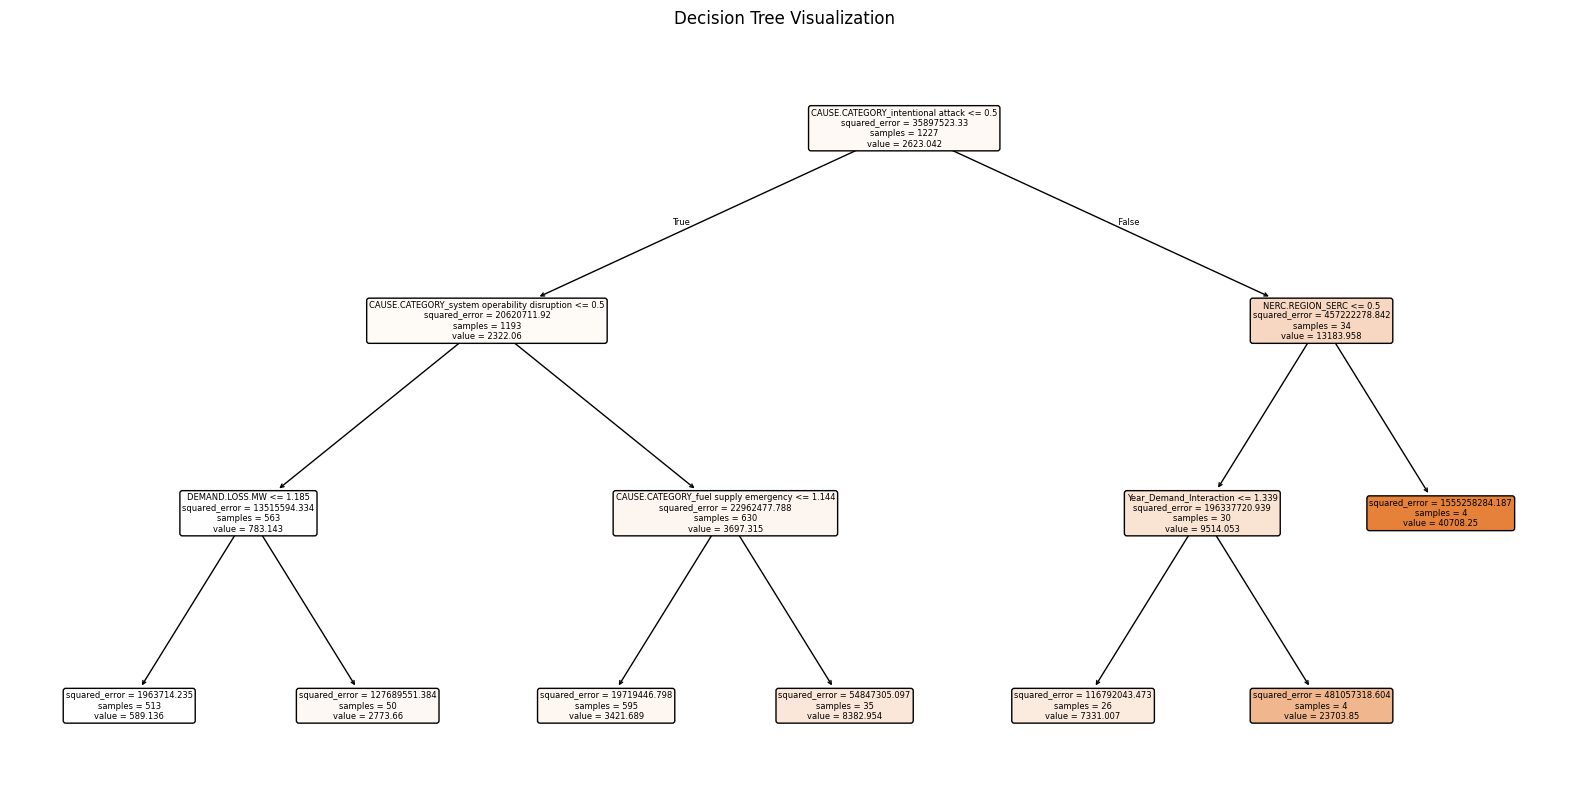

HTML file saved as 'assets/decision_tree.html'


<Figure size 640x480 with 0 Axes>

In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer

X = outageClean[['CAUSE.CATEGORY', 'NERC.REGION', 'U.S._STATE', 'YEAR', 'CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW']]
y = outageClean['OUTAGE.DURATION']

# use .loc from error message
X.loc[:, 'YEAR'] = X['YEAR'].fillna(0).astype(int)
X.loc[:, 'CAUSE.CATEGORY'] = X['CAUSE.CATEGORY'].fillna("Missing")
X.loc[:, 'NERC.REGION'] = X['NERC.REGION'].fillna("Missing")
X.loc[:, 'U.S._STATE'] = X['U.S._STATE'].fillna("Missing")
X.loc[:, 'CUSTOMERS.AFFECTED'] = X['CUSTOMERS.AFFECTED'].fillna(0)
X.loc[:, 'DEMAND.LOSS.MW'] = X['DEMAND.LOSS.MW'].fillna(0)
y = y.fillna(y.mean())

X['Year_Demand_Interaction'] = X['YEAR'] * X['DEMAND.LOSS.MW']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('quantile', QuantileTransformer(output_distribution='normal', n_quantiles=100)),
            ('scaler', StandardScaler())
        ]), ['CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW', 'Year_Demand_Interaction']),
        ('log', Pipeline(steps=[
            ('log', FunctionTransformer(np.log1p, validate=True)),
            ('scaler', StandardScaler())
        ]), ['CUSTOMERS.AFFECTED']),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['CAUSE.CATEGORY', 'NERC.REGION'])
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# hyperparams
param_grid = {
    'regressor__max_depth': [3, 5, 10, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Best Parameters: {grid_search.best_params_}")



from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import mpld3
numeric_features = ['CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW', 'Year_Demand_Interaction']
categorical_features = grid_search.best_estimator_.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out(
    ['CAUSE.CATEGORY', 'NERC.REGION']
)
feature_names = list(numeric_features) + list(categorical_features)

final_tree = final_model.named_steps['regressor']
plt.figure(figsize=(20, 10))
plot_tree(
    final_tree,
    feature_names=feature_names, 
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

html_str = mpld3.fig_to_html(plt.gcf())
with open("assets/decision_tree.html", "w") as f:
    f.write(html_str)

print("HTML file saved as 'assets/decision_tree.html'")





In [104]:
def plot_sorted_longest_outages_by_year(data):

    # drop rows where YEAR is NaN
    data = data.dropna(subset=["YEAR"])
    outage_summary = (
        data.groupby(["POSTAL.CODE", "YEAR"])
        .agg({"OUTAGE.DURATION": "max"})  
        .reset_index()
    )

    outage_summary = outage_summary.sort_values(by="YEAR")
    fig = px.choropleth(
        outage_summary,
        locations="POSTAL.CODE",  
        locationmode="USA-states",  
        color="OUTAGE.DURATION",  
        scope="usa",  
        animation_frame="YEAR",  # slider for year
        title="Longest Power Outages in the US by State (Yearly)",
        color_continuous_scale="Reds",
        labels={"OUTAGE.DURATION": "Outage Duration (minutes)", "YEAR": "Year"},  
    )

    return fig
plot_sorted_longest_outages_by_year(outageClean).show()